<table><tr>
<td align="left"  colspan="10"> <img src="images/ucl_logo.png"  alt="Drawing" style="width: 190px;"/> </td>
<td align="right" colspan="10"> <img src="images/nceo_logo.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

# NCEO ARD



In this repo, I will show a demo of accessing early version of NCEO ARD (analysis ready data). This NCEO ARD is Sentinel 2 (S2) surface reflectance has been corrected for atmospheric effects by [SIAC](https://eartharxiv.org/ps957/). Following the [CEOS Analysis Ready Data](http://ceos.org/ard/), we want to provide *satellite data that have been processed to a minimum set of requirements and organized into a form that allows immediate analysis with a minimum of additional user effort and interoperability both through time and with other datasets*. Additionaly, we also want to ensure consistent surface reflectance between sensors, which is the core part of SIAC trying to achieve (for more details, please refer to [SIAC paper](https://eartharxiv.org/ps957/)). Another import aspect of SIAC is the efforts in propogating the uncertainty through out the processing chain to get per pixel level uncertainty information.

## The geographic extend of NCEO ARD at the moment

We started the processing of NCEO ARD for the whole the UK for the last three years, 2017-2019, and we have also done a test processing over North China Plain, China.

<img src="images/uk_aoi.png" width="200" align="center">

## The Jasmin public http accessing server

The datasets is accessiable from [http://gws-access.jasmin.ac.uk/public/nceo_ard/S2](http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/). 

The S2 data has been stored in directories named after the [MGRS tiles](https://en.wikipedia.org/wiki/Military_Grid_Reference_System), and an example of an MGRS coordinate would be 30VVH12345678, which consists of three parts:

- 30V (grid zone designator, GZD)
- VH (the 100,000-meter square identifier)
- 12345678 (numerical location; easting is 1234 and northing is 5678, in this case specifying a location with 10 m resolution).

The S2 directories only use the first two part to create the directories, as the third part is the pixels coordinates in each S2 tile.

An example of 30VVH url would be: [http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/V/VH/](http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/V/VH/).


The way to find out the MGRS code for your specific location is by simply using a Python package called [mgrs](https://pypi.org/project/mgrs/), and an example usage is:

In [15]:
import mgrs

latitude = 51.5074
longitude = -0.1278

m = mgrs.MGRS()
c = m.toMGRS(latitude, longitude)
c

'30UXC9931610163'

### Accessing S2 tiles

So the link to the files over London: [http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/U/XC](http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/U/XC). Once we have the tile link, we can list all the available files under that directories.

In [52]:
from IPython.display import IFrame
url = 'http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/%s/%s/%s'%(c[:2], c[2:3], c[3:5])
print(url)
IFrame(src=url, width=900, height=400)

http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/U/XC


In [120]:
import requests
# Compose the url
url = 'http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/%s/%s/%s'%(c[:2], c[2:3], c[3:5])
r = requests.get(url)
# parse the requests content to get individual S2 files
s2Files = [i.split('href="')[1].split('/">')[0] for i in r.content.decode().split('\n') if c[:5] in i]
s2Files[:10]

['S2A_MSIL1C_20170102T111442_N0204_R137_T30UXC_20170102T111441.SAFE',
 'S2A_MSIL1C_20170105T112441_N0204_R037_T30UXC_20170105T112439.SAFE',
 'S2A_MSIL1C_20170112T111421_N0204_R137_T30UXC_20170112T111418.SAFE',
 'S2A_MSIL1C_20170115T112411_N0204_R037_T30UXC_20170115T112412.SAFE',
 'S2A_MSIL1C_20170119T110351_N0204_R094_T30UXC_20170119T110533.SAFE',
 'S2A_MSIL1C_20170125T112331_N0204_R037_T30UXC_20170125T112333.SAFE',
 'S2A_MSIL1C_20170129T110311_N0204_R094_T30UXC_20170129T110306.SAFE',
 'S2A_MSIL1C_20170201T111301_N0204_R137_T30UXC_20170201T111255.SAFE',
 'S2A_MSIL1C_20170204T112241_N0204_R037_T30UXC_20170204T112241.SAFE',
 'S2A_MSIL1C_20170208T110211_N0204_R094_T30UXC_20170208T110245.SAFE']

Once we have the tiles, we can access the S2 images taken over different dates.

### SIAC ouput json file

In [51]:
from IPython.display import IFrame
s2Tile = url + '/' + s2Files[0]
print(s2Tile)
IFrame(src=s2Tile, width=900, height=400)

http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/U/XC/S2A_MSIL1C_20170102T111442_N0204_R137_T30UXC_20170102T111441.SAFE


The `siac_output.json` is a json file created by SIAC to give a sumerised overview of the contents inside each corrected S2 scene. This is created for easy access of files and metadata inside each satellite image.

In [82]:
from IPython.display import IFrame
s2Json = url + '/' + s2Files[89] + '/' + 'siac_output.json'
print(s2Json)
IFrame(src=s2Json, width=900, height=400)

http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/U/XC/S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/siac_output.json


In [83]:
import json
# load the siac json file
r = requests.get(s2Json)
siacOutput = r.json()

In [84]:
# List the attributes
list(siacOutput['features'][0].keys())

['type',
 'properties',
 'geometry',
 'aoi',
 'siacLog',
 'toaOvrs',
 'boaOvrs',
 'toaOvrFull',
 'boaOvrFull',
 'viewAngles',
 'sunAngles',
 'SurfaceReflectance',
 'SurfaceReflectanceUncertainty',
 'atmoParas',
 'atmoParasUncs',
 'cloud']

### TOA and BOA overviews

In [85]:
# The boa overviews
siacOutput['features'][0]['boaOvrs']

['S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/BOA_ovr_large.png',
 'S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/BOA_ovr_medium.png',
 'S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/BOA_ovr_small.png']

Display the TOA overview:

<img src="http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/U/XC/S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/TOA_ovr_small.png" width="400" align="center">

Display the BOA overview:

<img src="http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/U/XC/S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/BOA_ovr_small.png" width="400" align="center">

### Surface reflectance

In [90]:
siacOutput['features'][0]['SurfaceReflectance']

['S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/T30UXC_20171108T111251_B01_sur.tif',
 'S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/T30UXC_20171108T111251_B02_sur.tif',
 'S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/T30UXC_20171108T111251_B03_sur.tif',
 'S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/T30UXC_20171108T111251_B04_sur.tif',
 'S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/T30UXC_20171108T111251_B05_sur.tif',
 'S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/T30UXC_20171108T111251_B06_sur.tif',
 'S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T13

#### Accessing via gdal /vsicurl/

Since the SIAC surface reflectances are stored in [Cloud Optimized GeoTIFF (COG)](https://www.cogeo.org), we can easily access the files with simple gdal `/vsicurl/`.

In [102]:
import gdal
s2Url = url + '/' + siacOutput['features'][0]['SurfaceReflectance'][3]
gdalUrl = '/vsicurl/' + s2Url
print(gdal.Info(gdalUrl))

Driver: GTiff/GeoTIFF
Files: /vsicurl/http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/30/U/XC/S2A_MSIL1C_20171108T111251_N0206_R137_T30UXC_20171108T132718.SAFE/GRANULE/L1C_T30UXC_A012432_20171108T111250/IMG_DATA/T30UXC_20171108T111251_B04_sur.tif
Size is 10980, 10980
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 30N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 30N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-3,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at n

#### Accessing subset of the whole image

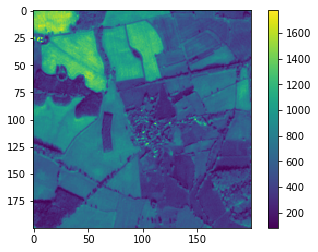

In [117]:
import pylab as plt
%matplotlib inline
g = gdal.Open(gdalUrl)
data = g.ReadAsArray(4000, 2000, 200, 200)
plt.imshow(data)
plt.colorbar()

#### To access some fields

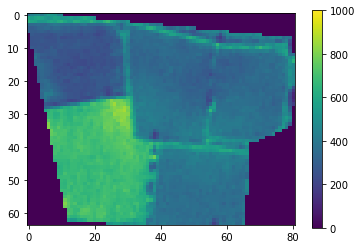

In [118]:
g = gdal.Warp('', gdalUrl, cutlineDSName = 'aoi/testField.geojson', cropToCutline = True, format = 'MEM')
data = g.ReadAsArray()
plt.imshow(data, vmin=0, vmax=1000)
plt.colorbar()

### Time series

We now know the way to access the S2 files from Jasmin public http server, then we can start to do some simple time series visualisation of satellite images.

In [130]:
# Filter the data to only show 2018
s2Files2018 = sorted([i for i in s2Files if (float(i.split('_')[2][:8]) >= 20180101) & (float(i.split('_')[2][:8]) <= 20181231)])

In [163]:
import os
import json
import numpy as np
b04s = []
for s2File in s2Files2018:
    s2_dir = 'http://gws-access.jasmin.ac.uk/public/nceo_ard/S2/'
    s2_tile = s2File.split('_')[-2][1:]
    tile_dir = '/'.join([s2_tile[:2], s2_tile[2], s2_tile[3:]])
    s2_tile_dir = s2_dir + tile_dir 
    fname = s2_tile_dir + '/' + s2File
    siacJson = fname + '/siac_output.json'
    r = requests.get(siacJson)
    siacOutput = r.json()
    b04 = siacOutput['features'][0]['SurfaceReflectance'][3]
    b04Url = s2_tile_dir + '/' + b04
    b04s.append(b04Url)

In [ ]:
b04dats = []
b08dats = []
clps = []

for b04 in b04s:
    b04Url = '/vsicurl/' + b04
    b08Url = b04Url.replace('B04_sur.tif', 'B08_sur.tif')
    
    cloudUrl = b04Url[:-43] + 'cloud.tif'
    
    g = gdal.Open(b04Url)
    data = g.ReadAsArray(3000, 3000, 6, 6)
    b04dats.append(data)
    
    g = gdal.Open(b08Url)
    data = g.ReadAsArray(3000, 3000, 6, 6)
    b08dats.append(data)
    
    
    g = gdal.Open(cloudUrl)
    # cloud is in 60 meters spatial resolution
    cloudProb = g.ReadAsArray(int(3000/6), int(3000/6), 1, 1)
    clps.append(cloudProb)
    
b04dats = np.array(b04dats) / 10000
b08dats = np.array(b08dats) / 10000
clps = np.array(clps).ravel()

In [ ]:
cloudMask = clps < 40
plt.plot(b04dats.mean(axis=(1,2))[cloudMask], 'o')